# Probability Tutorial

### Introduction

In this tutorial, we will explore the Mark and Recapture method, commonly used in ecology to estimate animal population sizes. We will also cover probability concepts, specifically using the binomial distribution to model outcomes of recapture experiments.

---

## Exercise 1: Mark and Recapture Sampling (Equal Probabilities)

### Context

We have a population of `N = 500` animals. A researcher captures and marks `M = 100` animals, then releases them back into the wild. After some time, the researcher recaptures a random sample of `n = 50` animals, and counts the number of marked animals recaptured, `X`.

---

### Task (a): Expected Number of Marked Animals in the Recaptured Sample

The number of marked animals recaptured, `X`, follows a **binomial distribution**:
$
X \sim \text{Binomial}(n = 50, p = \frac{M}{N} = \frac{100}{500})
$

The **expected value** of `X` is given by:

$
E(X) = n \cdot p
$

In [1]:
# Parameters
N = 500  # Total population size
M = 100  # Number of marked animals
n = 50   # Sample size

# Probability of capturing a marked animal
p = M / N

# Expected number of marked animals in the recaptured sample
E_X = n * p
print(f"Expected number of marked animals: {E_X}")

Expected number of marked animals: 10.0


But, let's calculate the Expected value using 

$ E(X) = \sum_{k = 1}^{n}k.p_{X}(k)$

In [3]:
from scipy.stats import binom
import numpy as np

x_values = np.arange(n + 1)
prob_vals = binom.pmf(x_values, n, p)
exp = (x_values * prob_vals).sum()
exp

10.00000000000001

In [4]:
import math


def binomial_probability(n, k, p):
    binomial_coeff = math.comb(n, k)
    return binomial_coeff * (p ** k) * ((1 - p) ** (n - k))

In [5]:
exp = 0.0
x_values  = list(range(1, n + 1))
for item in x_values:
    bin_prob = binomial_probability(n, item, p)
    exp += item * bin_prob


In [6]:
exp

10.000000000000021

### Task (b): Probability of Recapturing Exactly 10 Marked Animals
We can use the binomial probability formula to calculate the probability of recapturing exactly $k = 10$ marked animals:



In [7]:
k = 10
P_10 = binomial_probability(n, k, p)
print(f"Probability of exactly 10 marked animals: {P_10}")

Probability of exactly 10 marked animals: 0.13981900517431584


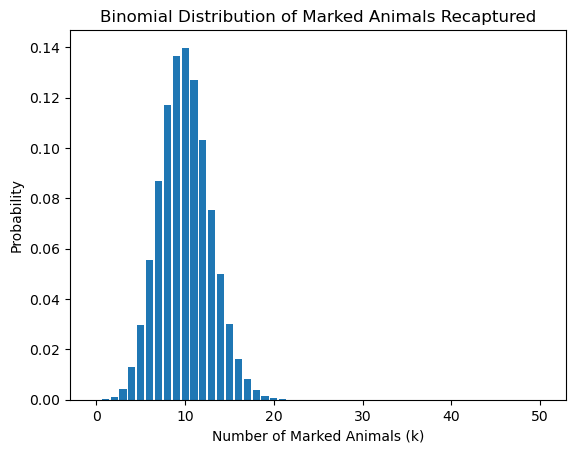

In [8]:
## Task c)
import matplotlib.pyplot as plt

# Calculate probabilities for all possible values of k (0 to 50)
k_values = range(n + 1)
probabilities = [binomial_probability(n, k, p) for k in k_values]

# Plot the histogram
plt.bar(k_values, probabilities)
plt.title('Binomial Distribution of Marked Animals Recaptured')
plt.xlabel('Number of Marked Animals (k)')
plt.ylabel('Probability')
plt.show()

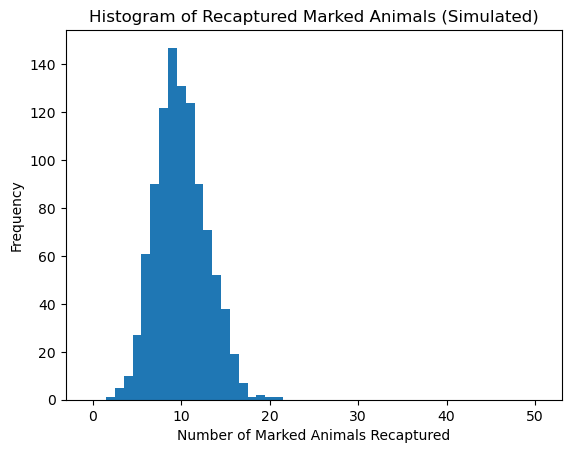

In [9]:
# Task d)
np.random.seed(0)

# Simulate the recapture process 1000 times
num_simulations = 1000
recaptured_marked = np.random.binomial(n, p, num_simulations)

# Plot histogram of the simulated values
plt.hist(recaptured_marked, bins=np.arange(0, n+2) - 0.5)
plt.title('Histogram of Recaptured Marked Animals (Simulated)')
plt.xlabel('Number of Marked Animals Recaptured')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Number of recaptured marked animals in this specific case
X_recaptured = 12

# Estimate the total population size
N_estimate = (M * n) / X_recaptured
print(f"Estimated population size: {N_estimate}")

Estimated population size: 416.6666666666667


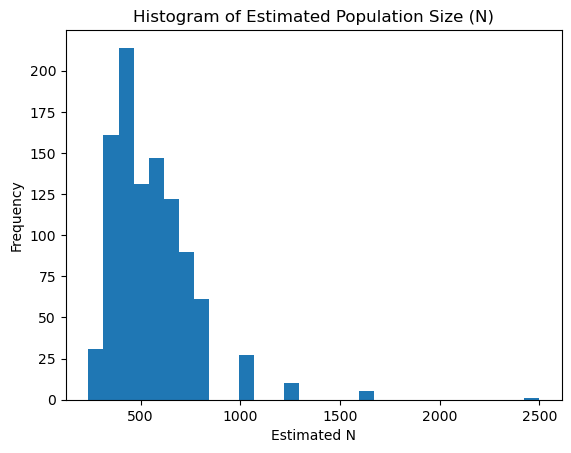

In [10]:
# Estimate N for each simulation
N_estimates = (M * n) / recaptured_marked

# Plot histogram of the estimates
plt.hist(N_estimates, bins=30)
plt.title('Histogram of Estimated Population Size (N)')
plt.xlabel('Estimated N')
plt.ylabel('Frequency')
plt.show()

# Exercise 2: Mark and Recapture Sampling (Unequal Probabilities)


In this exercise, we extend the Mark and Recapture method to account for unequal probabilities. We assume that the probability of capturing a marked animal is **50% higher** than the probability of capturing an unmarked animal.

- `M = 100`: Number of marked animals
- `N = 500`: Total population size
- `n = 50`: Sample size in the recapture phase

---

### Task (a): Calculate the Probabilities of Capturing Marked and Unmarked Animals

In this task, we need to calculate the probabilities of capturing a **marked animal** (`p_m`) and an **unmarked animal** (`p_u`) in the population. We are given the following:

- There are `M = 100` marked animals in the population.
- The total population size is `N = 500` animals.
- The probability of capturing a **marked animal** (`p_m`) is **1.5 times** the probability of capturing an **unmarked animal** (`p_u`).

#### Step 1: The sum of the probabilities must equal 1

We know that for each capture attempt, we must either capture a **marked** or **unmarked** animal, so the total probability must sum to 1:

$
M*p_m + (N-M)p_u = 1
$

#### Step 2: Express $ p_m $ in terms of $ p_u $

We are told that the probability of capturing a marked animal is 1.5 times the probability of capturing an unmarked animal:

$
p_m = 1.5 \cdot p_u
$


#### Final Step: Solve the Equations:

We get the first equation as:
$\\
100 \times p_m + 400 \times p_u = 1\\
150 \times p_u + 400 \times p_u = 1\\
p_u = \frac{1}{550}
$

This is the probability of getting one marked animal in the recapture phase out of 400. The total probability then becomes:
$
p_u = 400 \times \frac{1}{550}
$
Then, the probability of $p_m$ becomes:
$
p_m = 1 - p_u = \frac{3}{11}
$

In [11]:
# Parameters
M = 100  # Number of marked animals
N = 500  # Total population size
n = 50   # Sample size

p_m = 3/11

p_u = 1 - 3/11


# Display the results
print(f"Probability of capturing a marked animal (p_m): {p_m}")
print(f"Probability of capturing an unmarked animal (p_u): {p_u}")

Probability of capturing a marked animal (p_m): 0.2727272727272727
Probability of capturing an unmarked animal (p_u): 0.7272727272727273


### Task (b): Binomial Distribution for Recaptured Marked Animals

In this task, we will calculate the **binomial distribution** of the number of marked animals recaptured, `X`, from a sample of size `n = 50`.

#### Step 1: Binomial Distribution Formula

The number of marked animals recaptured, `X`, follows a **binomial distribution** with parameters:
- `n = 50`: The sample size (number of recapture attempts).
- p_m = $\frac{3}{11}$: The probability of success (recapturing a marked animal).

The probability mass function (PMF) of the binomial distribution is given by:

$
P(X = k) = \binom{n}{k} \cdot p_m^k \cdot (1 - p_m)^{n - k}
$

Where:
- `X` is the number of marked animals recaptured (`k = 0, 1, 2, ..., n`).
- `p_m` is the probability of capturing a marked animal.
- `n = 50` is the total number of recapture attempts.

#### Step 2: Compute the Distribution

We will calculate the binomial distribution for the possible number of marked animals recaptured (`k = 0, 1, 2, ..., 50`) and plot the probability distribution.

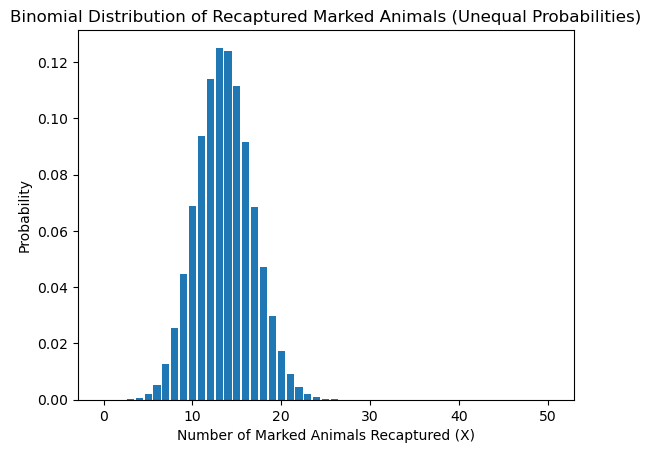

In [12]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

# Sample size in the recapture phase
n = 50

# Define the binomial distribution for recapturing marked animals
x_values = np.arange(0, n + 1)
binom_pmf = binom.pmf(x_values, n, p_m)

# Plot the binomial distribution
plt.bar(x_values, binom_pmf)
plt.title(
    'Binomial Distribution of Recaptured Marked Animals (Unequal Probabilities)')
plt.xlabel('Number of Marked Animals Recaptured (X)')
plt.ylabel('Probability')
plt.show()

In [13]:
# Task (c)

# Calculate the expected number of marked animals recaptured
E_X = n * p_m
print(f"Expected number of marked animals recaptured: {E_X}")

Expected number of marked animals recaptured: 13.636363636363635


In [14]:
# Parameters
M = 100  # Number of marked animals
n = 50   # Sample size (animals recaptured)
X = E_X   # Number of marked animals recaptured

# Step 1: Calculate the number of unmarked animals recaptured
X_u = n - X  # Number of unmarked animals recaptured

# Step 2: Estimate the total number of unmarked animals in the population
U_estimate = X_u / p_u

# Step 3: Estimate the total population size
N_estimate = (M / p_m) + U_estimate

# Print the estimated population size
print(f"Estimated total population size (N): {N_estimate}")

Estimated total population size (N): 416.6666666666667
